In [1]:
%cd ~/desktop/RNA/raptcouple_test

/Users/sumishunsuke/Desktop/RNA/raptcouple_test


# Fig. 3a: consensus diagram

Please see `example/Ishida2020/Ishida2020.ipynb` 

# Fig. 5b: Mutation effect prediction by RaptCouple  
Please see examples in Readme.  

In [23]:
%cd ~/desktop/RNA/raptcouple_test

/Users/sumishunsuke/Desktop/RNA/raptcouple_test


## Ishida2020

## simulate deletion scan by RaptCouple

In [117]:
from src.potts import PottsModel
from src.util import seq2onehot, onehot2seq
from src.plmc import read_params

# param_file = "example/Ishida2020/outputs/Ishida2020-6R-8-527-11090.77.model_params"
# param_file = "example/Ishida2020/outputs/Ishida2020-6R-1-2626-55264.43.model_params"
param_file = "example/Ishida2020/outputs/default_Ishida2020-6R-8-527-11090.77.model_params"
params = read_params(param_file)
potts = PottsModel.build_from_file(param_file)

help(potts.compute_delta_energy)

Help on method compute_delta_energy in module src.potts:

compute_delta_energy(mutations, print_debug=False) method of src.potts.PottsModel instance
    mutations: list of tuple (int_wt, pos, int_mut)
    compute delta energy by mutations



In [119]:
import pandas as pd 
from src.util import nuc2int,int2nuc

data_pred = []
matched_cols = [i for i,n in enumerate(params["target_seq"]) if n in "AUGC"]
print(params["target_seq"])
print(matched_cols)
for i_m, i in enumerate(matched_cols):
    int_nuc = nuc2int(params["target_seq"][i], is_dna=False, is_gapped=True)
    mutations_on_msa = [(int_nuc, i, nuc2int("."))]

    # get mutant seq 
    mutant_seq = list(params["target_seq"])
    mutant_seq[i] = "."
    mutant_seq = "".join(mutant_seq).replace(".","")

    delta_e = potts.compute_delta_energy(mutations_on_msa)
    n = params["target_seq"][i]
    k = f"{n}{i_m}."
    data_pred.append([k, mutant_seq, delta_e])




df_del_e = pd.DataFrame(data_pred, columns=["mut_str", "seq", "delta energy"])

# take min energy for each mutant
# df_del_e = df_del_e.groupby("seq").agg({"delta energy": "min"}).reset_index()
# df_del_e = df_del_e.sort_values("delta energy")
df_del_e

GCUGU.GUC.UA...C.G.U.CCG............GA.U..U..GG..GG.A..CC.U..G...C..AC........GG.CCCAUG
[0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 15, 17, 19, 21, 22, 23, 36, 37, 39, 42, 45, 46, 49, 50, 52, 55, 56, 58, 61, 65, 68, 69, 78, 79, 81, 82, 83, 84, 85, 86]


,mut_str,seq,delta energy
0,G0.,CUGUGUCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,-1.886261
1,C1.,GUGUGUCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,-0.922982
2,U2.,GCGUGUCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,-1.035132
3,G3.,GCUUGUCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,-0.635613
4,U4.,GCUGGUCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,-0.215681
5,G5.,GCUGUUCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,0.003555
6,U6.,GCUGUGCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,0.271805
7,C7.,GCUGUGUUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,0.665681
8,U8.,GCUGUGUCACGUCCGGAUUGGGGACCUGCACGGCCCAUG,0.805868
9,A9.,GCUGUGUCUCGUCCGGAUUGGGGACCUGCACGGCCCAUG,1.013189


In [120]:
# from the paper
mother = "GCUGUGUCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG"
experimental_data = {
    "GCUGUGU.UACGUCCGGAUUGGGGACCUGCACGGCCCAUG": 139,
    "GCUGUGUC.ACGUCCGGAUUGGGGACCUGCACGGCCCAUG": 1,
    "GCUGUGUCU.CGUCCGGAUUGGGGACCUGCACGGCCCAUG": 0,
    "GCUGUGUCUA.GUCCGGAUUGGGGACCUGCACGGCCCAUG": 0,
    "GCUGUGUCUAC.UCCGGAUUGGGGACCUGCACGGCCCAUG": 0,
    "GCUGUGUCUACG.CCGGAUUGGGGACCUGCACGGCCCAUG": 0,
    "GCUGUGUCUACGU.CGGAUUGGGGACCUGCACGGCCCAUG": 16,
    "GCUGUGUCUACGUC.GGAUUGGGGACCUGCACGGCCCAUG": 16,
    "GCUGUGUCUACGUCC.GAUUGGGGACCUGCACGGCCCAUG": 182,
    "GCUGUGUCUACGUCCG.AUUGGGGACCUGCACGGCCCAUG": 182,
    "GCUGUGUCUACGUCCGG.UUGGGGACCUGCACGGCCCAUG": 130,
    "GCUGUGUCUACGUCCGGA.UGGGGACCUGCACGGCCCAUG": 120, 
    "GCUGUGUCUACGUCCGGAU.GGGGACCUGCACGGCCCAUG": 120,
    "GCUGUGUCUACGUCCGGAUU.GGGACCUGCACGGCCCAUG": 174,
    "GCUGUGUCUACGUCCGGAUUG.GGACCUGCACGGCCCAUG": 174,
    "GCUGUGUCUACGUCCGGAUUGG.GACCUGCACGGCCCAUG": 174,
    "GCUGUGUCUACGUCCGGAUUGGG.ACCUGCACGGCCCAUG": 174,
    "GCUGUGUCUACGUCCGGAUUGGGG.CCUGCACGGCCCAUG": 43,
    "GCUGUGUCUACGUCCGGAUUGGGGA.CUGCACGGCCCAUG": 0,
    "GCUGUGUCUACGUCCGGAUUGGGGAC.UGCACGGCCCAUG": 0,
    "GCUGUGUCUACGUCCGGAUUGGGGACC.GCACGGCCCAUG": 0,
    "GCUGUGUCUACGUCCGGAUUGGGGACCU.CACGGCCCAUG": 3
}


data = []
mother = "GCUGUGUCUACGUCCGGAUUGGGGACCUGCACGGCCCAUG"
for seq, v in experimental_data.items():
    dot_i = [i for i,n in enumerate(seq) if n == "."][0]
    k = f"{mother[dot_i]}{dot_i}."
    data.append([k, seq.replace(".", ""), v])

# print(dict_experiment["C7."])
df_experiment = pd.DataFrame(data, columns=["mut_str", "seq", "relative binding"])
# df_experiment = df_experiment.groupby("seq").max().reset_index()
df_experiment

,mut_str,seq,relative binding
0,C7.,GCUGUGUUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,139
1,U8.,GCUGUGUCACGUCCGGAUUGGGGACCUGCACGGCCCAUG,1
2,A9.,GCUGUGUCUCGUCCGGAUUGGGGACCUGCACGGCCCAUG,0
3,C10.,GCUGUGUCUAGUCCGGAUUGGGGACCUGCACGGCCCAUG,0
4,G11.,GCUGUGUCUACUCCGGAUUGGGGACCUGCACGGCCCAUG,0
5,U12.,GCUGUGUCUACGCCGGAUUGGGGACCUGCACGGCCCAUG,0
6,C13.,GCUGUGUCUACGUCGGAUUGGGGACCUGCACGGCCCAUG,16
7,C14.,GCUGUGUCUACGUCGGAUUGGGGACCUGCACGGCCCAUG,16
8,G15.,GCUGUGUCUACGUCCGAUUGGGGACCUGCACGGCCCAUG,182
9,G16.,GCUGUGUCUACGUCCGAUUGGGGACCUGCACGGCCCAUG,182


In [121]:
# merge by seq
df_merged = pd.merge(df_experiment, df_del_e, on="mut_str")
df_merged

,mut_str,seq_x,relative binding,seq_y,delta energy
0,C7.,GCUGUGUUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,139,GCUGUGUUACGUCCGGAUUGGGGACCUGCACGGCCCAUG,0.665681
1,U8.,GCUGUGUCACGUCCGGAUUGGGGACCUGCACGGCCCAUG,1,GCUGUGUCACGUCCGGAUUGGGGACCUGCACGGCCCAUG,0.805868
2,A9.,GCUGUGUCUCGUCCGGAUUGGGGACCUGCACGGCCCAUG,0,GCUGUGUCUCGUCCGGAUUGGGGACCUGCACGGCCCAUG,1.013189
3,C10.,GCUGUGUCUAGUCCGGAUUGGGGACCUGCACGGCCCAUG,0,GCUGUGUCUAGUCCGGAUUGGGGACCUGCACGGCCCAUG,1.473714
4,G11.,GCUGUGUCUACUCCGGAUUGGGGACCUGCACGGCCCAUG,0,GCUGUGUCUACUCCGGAUUGGGGACCUGCACGGCCCAUG,1.753943
5,U12.,GCUGUGUCUACGCCGGAUUGGGGACCUGCACGGCCCAUG,0,GCUGUGUCUACGCCGGAUUGGGGACCUGCACGGCCCAUG,1.793861
6,C13.,GCUGUGUCUACGUCGGAUUGGGGACCUGCACGGCCCAUG,16,GCUGUGUCUACGUCGGAUUGGGGACCUGCACGGCCCAUG,1.586427
7,C14.,GCUGUGUCUACGUCGGAUUGGGGACCUGCACGGCCCAUG,16,GCUGUGUCUACGUCGGAUUGGGGACCUGCACGGCCCAUG,1.875659
8,G15.,GCUGUGUCUACGUCCGAUUGGGGACCUGCACGGCCCAUG,182,GCUGUGUCUACGUCCGAUUGGGGACCUGCACGGCCCAUG,1.993157
9,G16.,GCUGUGUCUACGUCCGAUUGGGGACCUGCACGGCCCAUG,182,GCUGUGUCUACGUCCGAUUGGGGACCUGCACGGCCCAUG,0.529554


In [137]:
# take min energy for each mutant
df_merged_min_e = df_merged.groupby("seq_x").agg({"delta energy": "min", "relative binding": "min"}).reset_index().sort_values("relative binding")
df_merged_min_e.to_csv("example/Ishida2020/variants/mutation_effect_predictions.csv", index=False)

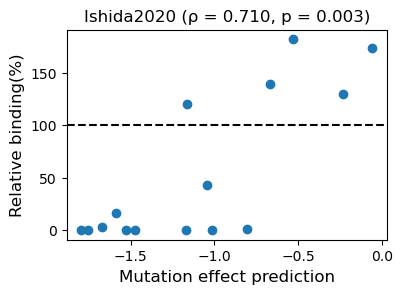

In [144]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


fig, ax = plt.subplots(figsize=(4,3))
offset = 0.3

plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
ax.set_xlabel("Mutation effect prediction", fontsize=12)
ax.set_ylabel("Relative binding(%)", fontsize=12)
corr,p = spearmanr(
    -df_merged_min_e["delta energy"],
    df_merged_min_e["relative binding"]
    )
plt.title(f"Ishida2020 (ρ = {corr:.3f}, p = {p:.3f})")
plt.scatter(-df_merged_min_e["delta energy"], df_merged_min_e["relative binding"])
plt.axhline(100, color="black", linestyle="--")
plt.savefig("example/Ishida2020/variants/mutation_effect_preds.pdf", transparent = True)
